In [2]:
import pandas as pd
import os
import matplotlib.pyplot as plt
from facebook_scraper import get_posts
import numpy as np
import seaborn as sb
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

### Consejales Azuay Examen 

Xavier Vidal Barrera - Concejal de Cuenca

Cristian Zamora - Concejal de Cuenca

In [11]:

#Metodo para contar las palabras del post obtenido
def contador(post):
    cont=0
    for char in post:        
            cont+=1
    return cont

publicaciones = [] 
# Obtenemos la información de las publicaciones
for post in get_posts('xavierbarrerav', pages=10):
        post['Word count'] = len(post['text'])
        publicaciones.append(post)          
facebook_posts = pd.DataFrame(publicaciones)
facebook_posts.describe()

,likes,comments,shares,Word count
count,38.000000,38.000000,38.000000,38.000000
mean,12.236842,0.342105,0.184211,310.447368
std,5.934026,0.668856,0.651620,150.003729
min,4.000000,0.000000,0.000000,116.000000
25%,8.000000,0.000000,0.000000,226.500000
50%,11.500000,0.000000,0.000000,272.000000
75%,16.000000,0.000000,0.000000,344.250000
max,35.000000,2.000000,3.000000,868.000000


In [14]:
#Lista donde se guardaran las publicaciones obtenidas
posts = []
#Obtenemos los post del candidato Xavier Vidal Barrera - Concejal de Cuenca
for post in get_posts('xavierbarrerav', pages=10):
    post['numWord']=contador(post['text'])
    posts.append(post)
#Obtenemos los post del candidato Cristian Zamora - Concejal de Cuenca
for post in get_posts('cristianzamoracuenca', pages=10):
    post['numWord']=contador(post['text'])    
    posts.append(post)    
fb_posts = pd.DataFrame(posts)

In [15]:
file = open("likes.txt","w") 
for like in fb_posts['likes']:
    file.write(str(like)+'\n')
file.close()

In [16]:
fb_posts.describe()

,likes,comments,shares,numWord
count,76.000000,76.000000,76.000000,76.000000
mean,93.815789,9.539474,1.171053,333.881579
std,373.470738,27.108395,4.634330,162.351304
min,4.000000,0.000000,0.000000,38.000000
25%,10.750000,0.000000,0.000000,222.500000
50%,19.000000,1.000000,0.000000,281.500000
75%,65.000000,6.250000,0.000000,424.000000
max,3245.000000,211.000000,31.000000,868.000000


In [17]:
fb_posts.head()

,post_id,text,post_text,shared_text,time,image,video,video_thumbnail,video_id,likes,comments,shares,post_url,link,user_id,images,numWord
0,3363460890434581,#RendimosCuentas\n\nCompartimos con ustedes la...,#RendimosCuentas\n\nCompartimos con ustedes la...,,2020-10-09 23:58:47,None,https://video.fgye15-1.fna.fbcdn.net/v/t42.904...,https://scontent.fgye15-1.fna.fbcdn.net/v/t15....,2438907723079794,16,2,0,https://facebook.com/watch?v=2438907723079794,None,495746513872714,[],206
1,3528399330607402,En comisión de Urbanismo recibimos en comisión...,En comisión de Urbanismo recibimos en comisión...,,2020-12-10 10:12:25,https://scontent.fgye15-1.fna.fbcdn.net/v/t1.0...,None,None,None,8,0,0,https://facebook.com/story.php?story_fbid=3528...,None,495746513872714,[https://scontent.fgye15-1.fna.fbcdn.net/v/t1....,241
2,3526078897506112,Como parte de la hoja de ruta establecida días...,Como parte de la hoja de ruta establecida días...,,2020-12-09 11:49:33,https://scontent.fgye15-1.fna.fbcdn.net/v/t1.0...,None,None,None,11,1,0,https://facebook.com/story.php?story_fbid=3526...,None,495746513872714,[https://scontent.fgye15-1.fna.fbcdn.net/v/t1....,431
3,3521589541288381,Entrevista en Radio Visión\n\nRadio Visión Cue...,Entrevista en Radio Visión,Radio Visión Cuenca 106.1 FM was live.\nDecemb...,2020-12-07 16:27:42,None,https://scontent.fgye15-1.fna.fbcdn.net/v/t66....,https://scontent.fgye15-1.fna.fbcdn.net/v/t15....,2752855358307660,13,0,2,https://facebook.com/story.php?story_fbid=3521...,http://radiovisioncuenca.com/,495746513872714,[],397
4,3518565208257481,Les invito a seguir la entrevista en el espaci...,Les invito a seguir la entrevista en el espaci...,,2020-12-06 11:34:19,None,https://video.fgye15-1.fna.fbcdn.net/v/t42.179...,https://scontent.fgye15-1.fna.fbcdn.net/v/t15....,422825572086674,5,0,0,https://facebook.com/watch?v=422825572086674,None,495746513872714,[],116


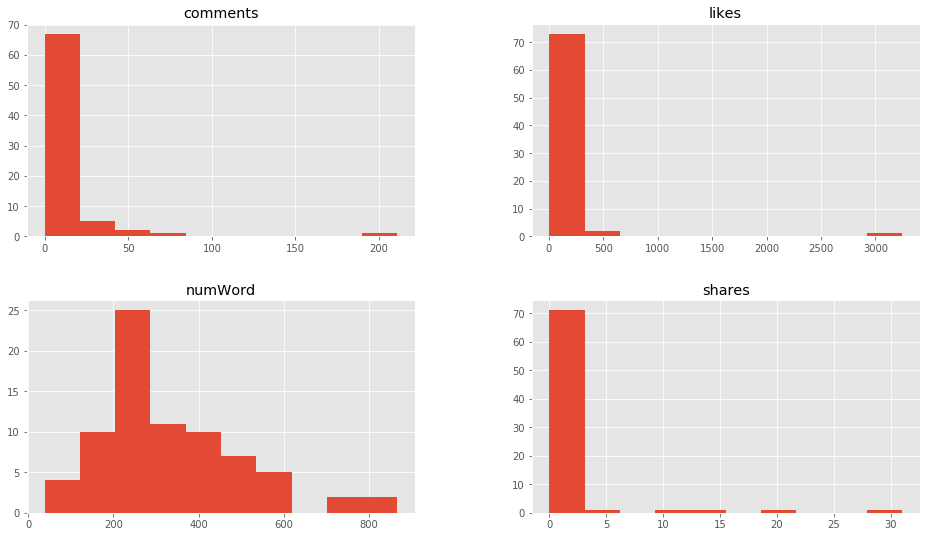

In [18]:
fb_posts.drop(['post_id','post_url', 'time'],1).hist()
plt.show()

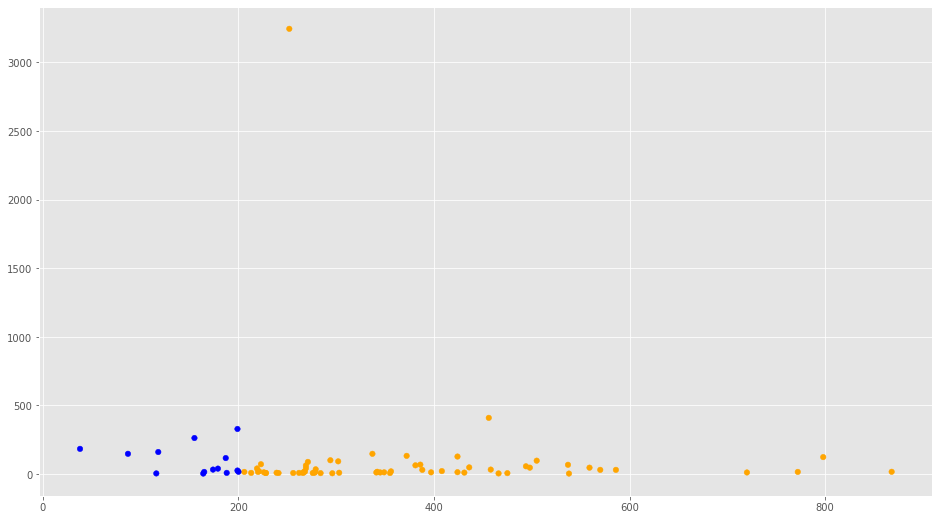

In [19]:
#vamos a Visualizar los datos de entrada
colores=['orange','blue']
tamanios=[30,60]

filtered_data = fb_posts[(fb_posts['numWord'] <= 3500) & (fb_posts['likes'] <= 80000)]

f1 = filtered_data['numWord'].values
f2 = filtered_data['likes'].values

asignar=[]
for index, row in filtered_data.iterrows():
    if(row['numWord']>200):
        asignar.append(colores[0])
    else:
        asignar.append(colores[1])
    
plt.scatter(f1, f2, c=asignar, s=tamanios[0])
plt.show()

Coefficients: 
 [-0.16785307]
Independent term: 
 149.858837334121
Mean squared error: 136912.27
Variance score: 0.01


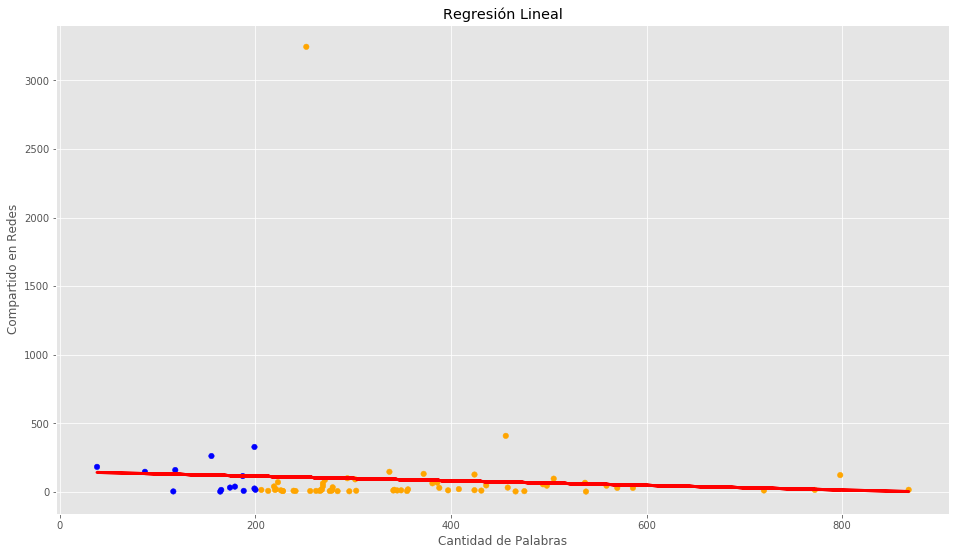

In [20]:
# Asignamos nuestra variable de entrada X para entrenamiento y las etiquetas Y.
dataX =filtered_data[["numWord"]]
X_train = np.array(dataX)
y_train = filtered_data['likes'].values
 
# Creamos el objeto de Regresión Linear
regr = linear_model.LinearRegression()
 
# Entrenamos nuestro modelo
regr.fit(X_train, y_train)
 
# Hacemos las predicciones que en definitiva una línea (en este caso, al ser 2D)
y_pred = regr.predict(X_train)
 
# Veamos los coeficienetes obtenidos, En nuestro caso, serán la Tangente
print('Coefficients: \n', regr.coef_)
# Este es el valor donde corta el eje Y (en X=0)
print('Independent term: \n', regr.intercept_)
# Error Cuadrado Medio
print("Mean squared error: %.2f" % mean_squared_error(y_train, y_pred))
# Puntaje de Varianza. El mejor puntaje es un 1.0
print('Variance score: %.2f' % r2_score(y_train, y_pred))


#Visualizamos la recta que se obtuvo
plt.scatter(X_train[:,0], y_train,  c=asignar, s=tamanios[0])
plt.plot(X_train[:,0], y_pred, color='red', linewidth=3)

plt.xlabel('Cantidad de Palabras')
plt.ylabel('Compartido en Redes')
plt.title('Regresión Lineal')

plt.show()

In [21]:

y_Dosmil = regr.predict([[2000]])
print(int(y_Dosmil))

-185


In [22]:
suma = (filtered_data["shares"] + filtered_data['comments'].fillna(0))

dataX2 =pd.DataFrame()
dataX2["numWord"] = filtered_data["numWord"]
dataX2["suma"] = suma
XY_train = np.array(dataX2)
z_train = filtered_data['likes'].values

In [23]:
# Creamos un nuevo objeto de Regresión Lineal
regr2 = linear_model.LinearRegression()
 
# Entrenamos el modelo, esta vez, con 2 dimensiones
# obtendremos 2 coeficientes, para graficar un plano
regr2.fit(XY_train, z_train)
 
# Hacemos la predicción con la que tendremos puntos sobre el plano hallado
z_pred = regr2.predict(XY_train)
 
# Los coeficientes
print('Coefficients: \n', regr2.coef_)
# Error cuadrático medio
print("Mean squared error: %.2f" % mean_squared_error(z_train, z_pred))
# Evaluamos el puntaje de varianza (siendo 1.0 el mejor posible)
print('Variance score: %.2f' % r2_score(z_train, z_pred))

Coefficients: 
 [ 0.03682282 11.54037996]
Mean squared error: 30497.98
Variance score: 0.78


In [26]:

z_Dosmil = regr2.predict([[2000, 10+4+6]])
print(int(z_Dosmil))

262


In [27]:
import random

random.seed(1)
Barreraz_digits = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Floreso_digits = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Barrera_win_pct = 58.13
Floreso_win_pct = 41.28
number_of_sims = 1000
total_wards = 0
total_Xavier_Barreraz_votes = 0
total_Paola_Floreso_votes = 0
total_votes = 0
for i in range(number_of_sims):
    my_input = open('likes.txt')
    for line in my_input:
        total_wards += 1
        fields = line.strip().split()
        num_voters = int(fields[0])
        arauz_votes_in_ward = 0
        lasso_votes_in_ward = 0
        for j in range(num_voters):
            random_num = random.random() * 100
            if random_num <= lasso_win_pct:
                lasso_votes_in_ward += 1
                total_lasso_votes += 1
            elif random_num <= (lasso_win_pct + arauz_win_pct) :
                arauz_votes_in_ward += 1
                total_arauz_votes += 1
            total_votes += 1
        arauz_digit = int(str(in_ward)[0])
        lasso_digit = int(str(votes_in_ward)[0])
        arauz_digits[arauz_digit] += 1
        lasso_digits[lasso_digit] += 1
    if i % 100 == 0:
        print('Simulacion con ', i)

arauz_win_pct = 100.0 * total_arauz_votes / total_votes
lasso_win_pct = 100.0 * total_lasso_votes / total_votes
print('Xavier Barrera Vidal gana con el:', lasso_win_pct , '%')
print('Paola Flores gana con el:', arauz_win_pct, '%')

Simulacion con  0
Simulacion con  100
Simulacion con  200
Simulacion con  300
Simulacion con  400
Simulacion con  500
Simulacion con  600
Simulacion con  700
Simulacion con  800
Simulacion con  900
GUILLERMO LASSO gana con el: 69.14645161290322 %
ARAUZ gana con el: 29.264277699859747 %


In [29]:
import simpy
import random
import matplotlib.pyplot as pp
import random

%matplotlib inline

MAXIMO_VOTANTES = 50
NUMERO_MESAS = 3
TIEMPO_VOTACION = 10
TIEMPO_LLEGADA = 5
TIEMPO_SIMULACION = 50

# Creamos un diccionario para almacenar las horas en que se sufragan los votantes..
votos = {}

class Lugar_Votacion():

    def __init__(self, environment, numero_mesas, tiempo_votacion):
        # Guardar el entorno en una variable
        self.env = environment
        # Recurso que representa las mesas electorales
        self.mesa = simpy.Resource(environment, numero_mesas)
        # Variable para el tiempo de atención.
        self.tiempo_votacion = tiempo_votacion

    def atender_votante(self, votante):
        # Simular la votación
        yield self.env.timeout(random.randint(TIEMPO_VOTACION - 5, TIEMPO_VOTACION + 5))

def llegada_votante(env, nombre, Lugar_Votacion):
    print('El %s llega a sufragar' % (nombre))

    # Especificamos que vamos a usar un recurso (Resource) que representa
    with Lugar_Votacion.mesa.request() as maquina:
        # Ocupamos la mesa electoral.
        yield maquina
        # El votante ingresa a votar.
        print('El %s ingresa a sufragar:' % (nombre))
        # Procesamos la operacion de sufragio
        yield env.process(Lugar_Votacion.atender_votante(nombre))
        # Una vez que termina la llamada con 'yield', se indica que se ha atendido al votante.
        print('EL %s entra a sufragar'%(nombre))
        print('El %s recibe su certificado de votación.'%(nombre))
        print('El %s sale del Recinto Electoral.'%(nombre))
        votos[nombre] = random.randint(1, 3) #Aleatorio para los votos a las diferentes listas.


def simular(env, mesas, tiempo_votacion, intervalo):
    lugar = Lugar_Votacion(env, mesas, tiempo_votacion)
    # Iniciamos con 3 votantes
    for i in range(3):
        env.process(llegada_votante(env, 'votante-%d' % (i + 1), lugar))

    # Ejecutamos la simulación
    while True:
        yield env.timeout(random.randint(intervalo - 3, intervalo + 3))
        i += 1
        # generamos mas votantes
        env.process(llegada_votante(env, 'votante-%d' % (i + 1), lugar))


print('Recinto')

# Creamos el entorno de simulacion
env = simpy.Environment()
env.process(simular(env, NUMERO_MESAS, TIEMPO_VOTACION, TIEMPO_LLEGADA))

# Ejecutamos el proceso durante el tiempo de simulacion
env.run(until=TIEMPO_SIMULACION)

print("Detalle de los votos")
print(votos)

Recinto
El votante-1 llega a sufragar
El votante-2 llega a sufragar
El votante-3 llega a sufragar
El votante-1 ingresa a sufragar:
El votante-2 ingresa a sufragar:
El votante-3 ingresa a sufragar:
El votante-4 llega a sufragar
EL votante-1 entra a sufragar
El votante-1 recibe su certificado de votación.
El votante-1 sale del Recinto Electoral.
El votante-4 ingresa a sufragar:
El votante-5 llega a sufragar
EL votante-3 entra a sufragar
El votante-3 recibe su certificado de votación.
El votante-3 sale del Recinto Electoral.
El votante-5 ingresa a sufragar:
EL votante-2 entra a sufragar
El votante-2 recibe su certificado de votación.
El votante-2 sale del Recinto Electoral.
El votante-6 llega a sufragar
El votante-6 ingresa a sufragar:
EL votante-4 entra a sufragar
El votante-4 recibe su certificado de votación.
El votante-4 sale del Recinto Electoral.
El votante-7 llega a sufragar
EL votante-5 entra a sufragar
El votante-5 recibe su certificado de votación.
El votante-5 sale del Recinto 